In [1]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

X,y = load_iris().data, load_iris().target

pca = PCA(n_components= 0.95)
X2D = pca.fit_transform(X)

# 查看wd矩阵的转置
#pca.components_

# 8.3.5 可解释方差比

In [2]:
#pca.explained_variance_ratio_

# 8.3.6 选择正确的维度

In [3]:
import numpy as np

# 设置随机种子
np.random.seed(42)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [4]:
pca = PCA(n_components= 0.95)
X_reduced = pca.fit_transform(X)

In [5]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [6]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

# 将可解释方差可视化

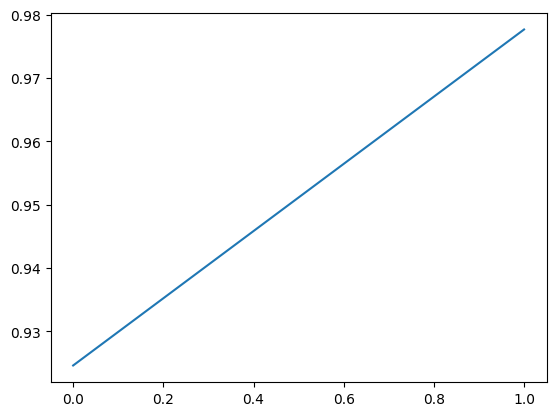

In [7]:
import matplotlib.pyplot as plt
plt.plot(cumsum)
plt.show()

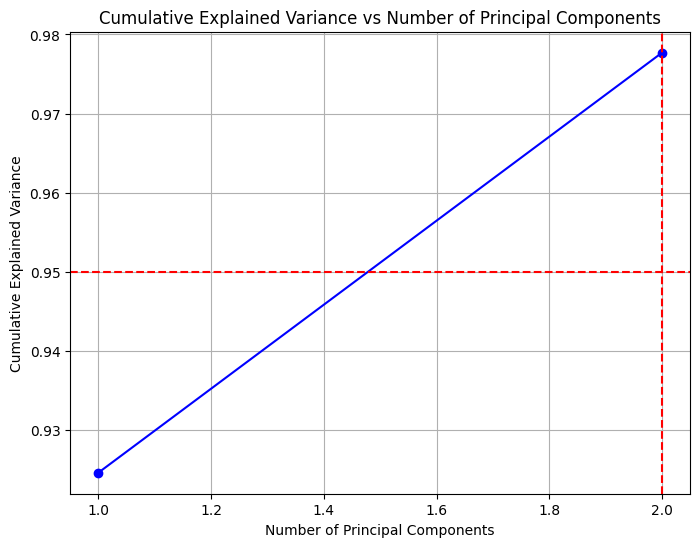

满足保留 95% 方差所需的最少主成分数: 2
各主成分的可解释方差比:
主成分 1: 0.9246
主成分 2: 0.0531


In [8]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

# 加载鸢尾花数据集
X, y = load_iris().data, load_iris().target

# 进行 PCA 降维，保留 95% 的方差
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

# 计算累计可解释方差
cumsum = np.cumsum(pca.explained_variance_ratio_)

# 找到满足保留 95% 方差所需的最少主成分数
d = np.argmax(cumsum >= 0.95) + 1

# 绘制累计可解释方差与主成分数量的关系图
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumsum) + 1), cumsum, marker='o', linestyle='-', color='blue')
# 标记出满足 95% 方差的点
plt.axvline(x=d, color='red', linestyle='--')
plt.axhline(y=0.95, color='red', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs Number of Principal Components')
plt.grid(True)
plt.show()

print(f"满足保留 95% 方差所需的最少主成分数: {d}")
print("各主成分的可解释方差比:")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"主成分 {i+1}: {ratio:.4f}")